In [28]:

# ------------------------------------------------------
# STEP 1: Import Libraries
# ------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

import gradio as gr


In [29]:

# ------------------------------------------------------
# STEP 2: Load Dataset (Data Collection)
# ------------------------------------------------------
import os

downloads_path = r"C:\Users\user\Downloads"
files = os.listdir(downloads_path)
print(files)
df = pd.read_csv("C:/Users/user/Documents/studentPerformance.csv")


df.head()


['1st-Workshop.pdf', '250px-tumblr_lyjqq7mgt81rorhaa.jpg', 'Abnegation_logo.webp', 'bbeba61b-05be-4fb4-b2cc-2a831c9d46a0.png', 'Bureau - Raccourci.lnk', 'ca0ebc0d-9686-41b3-8dfa-c3d43f3647f2', 'Candor.webp', 'Chapitre 1_Macroeconomie.pdf', 'Cité idéale sous un ciel doré (1).png', 'Cité idéale sous un ciel doré.png', 'Copie-de-Geometric-Abstract-Introduction-to-HTML-Tutorial.pptx', 'COURS HYPERFRE chapitre 1.pdf', 'Cours reseau 1-Architectures-Foncions-2024-partie1_240905_192421.PDF (1).pdf', 'Cours reseau 1-Architectures-Foncions-2024-partie1_240905_192421.PDF (2).pdf', 'Cours reseau 1-Architectures-Foncions-2024-partie1_240905_192421.PDF.pdf', 'Cours_circuits numériques (2).pdf', 'cssWork.html', 'Dauntlessmovie.webp', 'desktop.ini', 'Erudite.webp', 'fddb4eb9-11f5-4b14-bf76-8c0ba61e565f.png', 'images.jpeg', 'Linear-regression-and-logistic-regression_compressed-1 (1).pdf', 'Linear-regression-and-logistic-regression_compressed-1.pdf', 'MV5BMTYxMzYwODE4OV5BMl5BanBnXkFtZTgwNDE5MzE2MDE@._V1

,Study_Hours,Attendance,Practice_Tests,Final_Score,Pass_Fail
0,3.745401,59.256646,1,53.580408,1
1,9.507143,77.095047,2,84.990141,1
2,7.319939,93.647292,3,100.000000,1
3,5.986585,86.611244,1,76.978847,1
4,1.560186,90.328057,0,46.875418,0


In [30]:

# ------------------------------------------------------
# STEP 3: Data Preparation / Preprocessing
# ------------------------------------------------------

# Check missing values
print("Missing values:\n", df.isnull().sum())

# Drop duplicates if any
df = df.drop_duplicates()

# Features and Targets
X = df[["Study_Hours", "Attendance", "Practice_Tests"]]
y_reg = df["Final_Score"]   # Regression target
y_clf = df["Pass_Fail"]     # Classification target

# Train-test split
X_train, X_test, y_reg_train, y_reg_test = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)
_, _, y_clf_train, y_clf_test = train_test_split(
    X, y_clf, test_size=0.2, random_state=42
)


# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Missing values:
 Study_Hours       0
Attendance        0
Practice_Tests    0
Final_Score       0
Pass_Fail         0
dtype: int64


       Study_Hours  Attendance  Practice_Tests  Final_Score   Pass_Fail
count   500.000000  500.000000      500.000000   500.000000  500.000000
mean      4.985617   75.877906        2.068000    70.749858    0.840000
std       2.986884   14.859647        1.448991    19.537338    0.366973
min       0.050616   50.246999        0.000000    14.941156    0.000000
25%       2.412797   62.061402        1.000000    55.231234    1.000000
50%       5.131637   76.986917        2.000000    70.714751    1.000000
75%       7.561249   88.867188        3.000000    86.895891    1.000000
max       9.929648   99.970686        7.000000   100.000000    1.000000


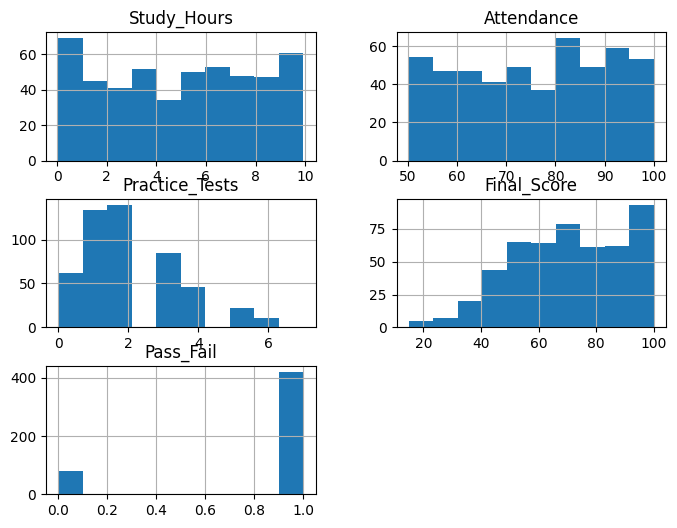

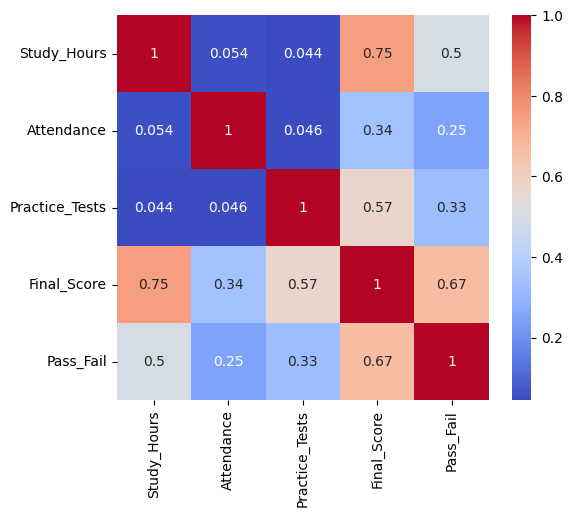

In [31]:

# ------------------------------------------------------
# STEP 4: Exploratory Data Analysis (EDA)
# ------------------------------------------------------
print(df.describe())

# Histograms
df.hist(figsize=(8,6))
plt.show()

# Correlation heatmap
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


In [32]:

# ------------------------------------------------------
# STEP 5: Feature Engineering
# ------------------------------------------------------
# Example: Efficiency feature (optional)
df["Efficiency"] = df["Study_Hours"] / (df["Practice_Tests"] + 1)
df.head()


,Study_Hours,Attendance,Practice_Tests,Final_Score,Pass_Fail,Efficiency
0,3.745401,59.256646,1,53.580408,1,1.872701
1,9.507143,77.095047,2,84.990141,1,3.169048
2,7.319939,93.647292,3,100.000000,1,1.829985
3,5.986585,86.611244,1,76.978847,1,2.993292
4,1.560186,90.328057,0,46.875418,0,1.560186


In [33]:

# ------------------------------------------------------
# STEP 6 & 7: Model Selection + Training
# ------------------------------------------------------

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_reg_train)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_clf_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [34]:

# ------------------------------------------------------
# STEP 8: Model Evaluation
# ------------------------------------------------------

# Regression evaluation
y_reg_pred = lin_reg.predict(X_test_scaled)
print("Regression - MSE:", mean_squared_error(y_reg_test, y_reg_pred))
print("Regression - R2:", r2_score(y_reg_test, y_reg_pred))

# Classification evaluation
y_clf_pred = log_reg.predict(X_test_scaled)
print("Classification Accuracy:", accuracy_score(y_clf_test, y_clf_pred))
print("\nClassification Report:\n", classification_report(y_clf_test, y_clf_pred))


Regression - MSE: 31.679086705632816
Regression - R2: 0.9022634762776158
Classification Accuracy: 0.92

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.59      0.71        17
           1       0.92      0.99      0.95        83

    accuracy                           0.92       100
   macro avg       0.92      0.79      0.83       100
weighted avg       0.92      0.92      0.91       100



In [35]:

# ------------------------------------------------------
# STEP 9: Hyperparameter Tuning (Logistic Regression example)
# ------------------------------------------------------
param_grid = {"C": [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train_scaled, y_clf_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)


Best Parameters: {'C': 10}
Best CV Score: 0.9475000000000001


In [36]:

# ------------------------------------------------------
# STEP 10: Deployment with Gradio
# ------------------------------------------------------

def predict_performance(study_hours, attendance, practice_tests):
    X_input = scaler.transform([[study_hours, attendance, practice_tests]])
    score_pred = lin_reg.predict(X_input)[0]
    pass_fail_pred = log_reg.predict(X_input)[0]
    result = "PASS ✅" if pass_fail_pred == 1 else "FAIL ❌"
    return round(score_pred,2), result

interface = gr.Interface(
    fn=predict_performance,
    inputs=["number", "number", "number"],
    outputs=["number", "text"],
    title="🎓 Student Performance Predictor",
    description="Enter study hours, attendance, and practice tests to predict final score and pass/fail."
)

interface.launch(share=True)


* Running on local URL:  http://127.0.0.1:7861
* Running on public URL: https://0d7848850a47b11f99.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
